동작 테스트만 간단하게 진행 가능하도록 최대한 간략하게 유지하는 노트북입니다.

# Global Settings

In [1]:
import os
from os import path
import sys

PROJECT_DIR = path.abspath(path.join(os.getcwd(), "..", ".."))
sys.path.append(PROJECT_DIR)
DATA_DIR = path.join(PROJECT_DIR, "data")

# 1. prepare_dataset

In [ ]:
from utils import resize_dataset

size = "onlyone"
original_size = "demo"

datasetDir = path.join(DATA_DIR, "MIND", size)
datasetOriginalDir = path.join(DATA_DIR, "MIND", original_size)

os.makedirs(path.join(datasetDir, "train"), exist_ok=True)
os.makedirs(path.join(datasetDir, "test"), exist_ok=True)

train_data_number = 2
test_data_number = 1
random_seed = 5

In [3]:
resize_dataset.resize_dataset(datasetDir, datasetOriginalDir, train_data_number, test_data_number, random_seed)

100%|██████████| 1/1 [00:00<?, ?it/s]


# 2. processing_data

In [ ]:
from data.preprocess.prep_news import PrepNews

wordEmbeddingPath = path.join(DATA_DIR, "word_embeddings", "glove.840B.300d.txt")
npy_path = path.join(DATA_DIR, "word_embeddings", "glove.840B.300d.npy")
word2int_path = path.join(DATA_DIR, "word_embeddings", "glove.840B.300d.tokens.tsv")

PrepNews.process_word_embeddings_to_npy(wordEmbeddingPath, npy_path, word2int_path)

c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


preparing/processing word-embeddings


100%|██████████| 2196018/2196018 [01:18<00:00, 28077.23it/s]


load word-embeddings


100%|██████████| 2196017/2196017 [00:01<00:00, 1159753.57it/s]


In [3]:
from data.preprocess.prep_dataset import PrepDataset, PrepDatasetArgs

args = PrepDatasetArgs(
    size = "onlyone",
    split_test_size = 0.1,
    n_negative = 4,
    max_title = 40,
    max_abstract = 80
)
prep_dataset = PrepDataset(args)
prep_dataset.pre_processing_dataset()

preparing training data


100%|██████████| 1/1 [00:00<?, ?it/s]


preparing eval data


100%|██████████| 1/1 [00:00<?, ?it/s]


preparing eval data


100%|██████████| 1/1 [00:00<00:00, 999.83it/s]

load word-embeddings



100%|██████████| 2196017/2196017 [00:01<00:00, 1413018.78it/s]
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


preparing/processing train news content


Device set to use cuda:0
100%|██████████| 84/84 [00:00<00:00, 103.58it/s]
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


preparing/processing test news content


Device set to use cuda:0
100%|██████████| 26/26 [00:00<00:00, 213.12it/s]


# 3. train_and_test

In [2]:
from utils.model_manager import ModelManager, ManagerArgs

args = [
    ManagerArgs(
        config_path = path.join(PROJECT_DIR, "config/model/nrms/exp_onlyone1.yaml")
    )
]
model_manager = ModelManager(PROJECT_DIR, args, "train", False)
test_results = model_manager.train_test_all()

c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 1234
100%|██████████| 1/1 [00:00<00:00, 999.60it/s]
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\trainer\setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:654: Checkpoint directory C:\Users\USER\Desktop\projects\python\newsrecommend\SentiRecTest\project\logs\lightning_logs\checkpoints\nrms\exp_onlyone1 exists and is not empty.

   | Name                                   | Type             | Params | Mode 
------------------------

c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\loops\fit_loop.py:310: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|██████████| 1/1 [00:00<00:00,  9.59it/s, v_num=one1]

Metric val_auc_epoch improved. New best score: 0.625
Epoch 0, global step 1: 'val_auc_epoch' reached 0.62500 (best 0.62500), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\nrms\\exp_onlyone1\\epoch=0-val_auc_epoch=0.6250-v1.ckpt' as top 3


Epoch 1: 100%|██████████| 1/1 [00:00<00:00,  9.13it/s, v_num=one1]

Epoch 1, global step 2: 'val_auc_epoch' reached 0.62500 (best 0.62500), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\nrms\\exp_onlyone1\\epoch=1-val_auc_epoch=0.6250-v1.ckpt' as top 3


Epoch 2: 100%|██████████| 1/1 [00:00<00:00,  9.73it/s, v_num=one1]

Epoch 2, global step 3: 'val_auc_epoch' reached 0.62500 (best 0.62500), saving model to 'C:\\Users\\USER\\Desktop\\projects\\python\\newsrecommend\\SentiRecTest\\project\\logs\\lightning_logs\\checkpoints\\nrms\\exp_onlyone1\\epoch=2-val_auc_epoch=0.6250-v1.ckpt' as top 3


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  9.60it/s, v_num=one1]

Epoch 3, global step 4: 'val_auc_epoch' was not in top 3


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 10.01it/s, v_num=one1]

Epoch 4, global step 5: 'val_auc_epoch' was not in top 3


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 10.01it/s, v_num=one1]

Monitored metric val_auc_epoch did not improve in the last 5 records. Best score: 0.625. Signaling Trainer to stop.
Epoch 5, global step 6: 'val_auc_epoch' was not in top 3


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  4.97it/s, v_num=one1]

Seed set to 1234


100%|██████████| 1/1 [00:00<00:00, 499.80it/s]
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\USER\anaconda3\envs\newsrec\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 17.82it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         Test metric                 DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_auc_epoch             0.3181818127632141
test_ils_senti@10_bert_epoch      0.4899059236049652
test_ils_senti@10_vader_epoch      0.21966552734375
 test_ils_senti@5_bert_epoch      0.32343438267707825
test_ils_senti@5_vader_epoch      0.21803000569343567
   test_ils_topic@10_epoch        0.02222222276031971
   test_ils_topic@5_epoch         0.10000000149011612
       test_mrr_epoch                   0.0625
     test_ndcg@10_epoch                   0.0
      test_ndcg@5_epoch                   0.0
  test_senti@10_bert_epoch                0.0
  test_senti@10_vader_epoch               0.0
   test_senti@5_bert_epoch         

# 4. Visualization

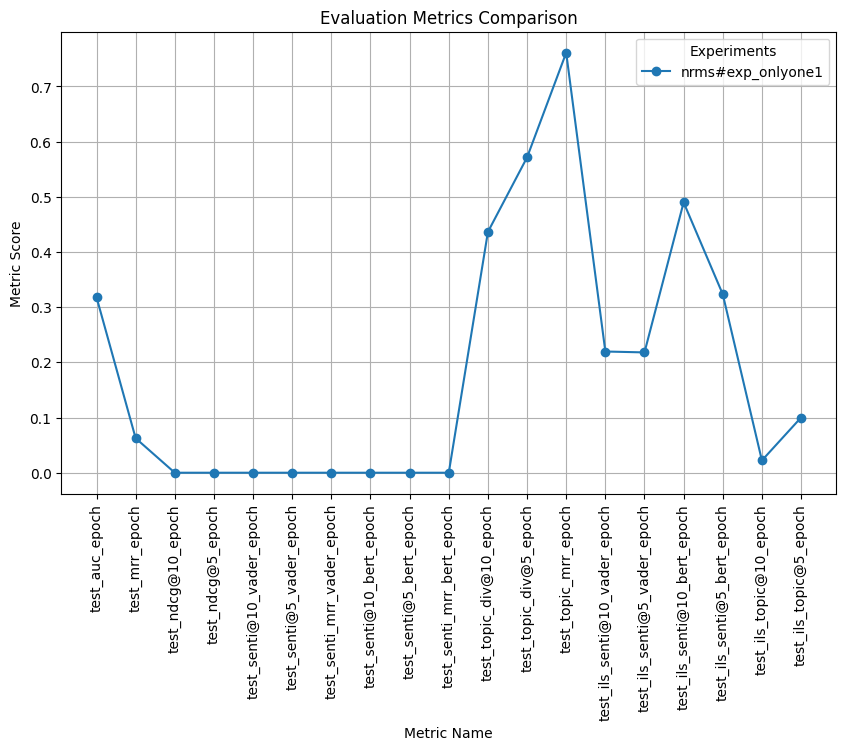

In [3]:
from utils.test_metrics_viewer import TestMetricsViewer

result_viewer = TestMetricsViewer(test_results)
result_viewer.show()

# 5. Using Model

In [5]:
from utils.model_manager import ModelManager
from utils.base_manager import ManagerArgs

args = ManagerArgs(
    config_path = path.join(PROJECT_DIR, "config/model/nrms/exp_demo1.yaml"),
    test_ckpt_path = path.join(PROJECT_DIR, "logs/lightning_logs/checkpoints/nrms/exp_demo1/epoch=24-val_auc_epoch=0.6996.ckpt")
)

model_manager = ModelManager(PROJECT_DIR, args, "test")
result = model_manager.show_result(0)

Seed set to 1234
100%|██████████| 7538/7538 [00:06<00:00, 1205.02it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Rank    Score    Label  index 
--------------------------------
1      21.96449    0      8   
2      21.63985    0      21  
3      14.37056    0      20  
4      13.39139    0      22  
5      7.60424     0      17  
6      4.49830     0      26  
7      3.25125     0      23  
8      2.46181     0      0   
9      0.83084     0      1   
10     0.31242     0      11  
11     0.16820     0      16  
12     -0.67941    0      27  
13     -3.86770    1      9   
14     -5.43905    0      25  
15     -6.06323    0      18  
16     -8.16474    0      24  
17     -8.50863    0      5   
18     -8.97648    0      10  
19     -9.31507    0      6   
20    -10.63651    0      15  
21    -11.07256    0      14  
22    -12.26732    0      13  
23    -12.92857    0      3   
24    -12.96733    0      12  
25    -13.71577    0      19  
26    -17.14813    0      2   
27    -24.28173    0      7   
28    -29.99214    0      4   


In [11]:
word2int = model_manager.get_word2int()
word2int.set_index('word_index', inplace=True)

# 1. history의 맨 마지막 뉴스
batch_data = model_manager.get_batch_from_dataloader(0)
h_title = batch_data['h_title'][0]
title_len = h_title.shape[0]
title: list = h_title[title_len-1].tolist()
print(title)

def get_str_from_index_list(word2int, index_list):
    words = []
    for index in index_list:
        if index == 0:
            continue
        word = word2int.loc[index]['word']
        words.append(word)

    sentence = ' '.join(words)
    return sentence

sentence = get_str_from_index_list(word2int, title)
print(sentence)

[7613, 204, 1136, 104, 7096, 273, 131, 310, 1104, 801, 372, 1807, 46, 29, 12290, 24, 1534, 1115, 0, 0]
bridge has definitely been burned ' : williams says redskins have smeared him in aftermath of cancer diagnosis
